In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [12]:
dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
dataset = dataset.append(test_dataset, ignore_index=True, sort=False)

In [13]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [14]:
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [15]:
male_female = dataset.groupby(['Sex'])['Sex'].count()

C:\Users\vntatsi\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


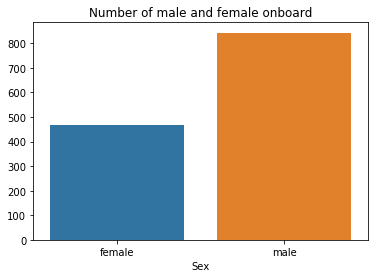

In [16]:
sns.barplot(male_female.index, male_female.values)
plt.title('Number of male and female onboard')

plt.show()

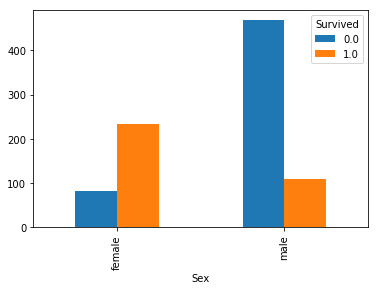

In [17]:
dataset.groupby(['Sex', 'Survived'])['Sex'].count().unstack().plot.bar()
plt.show()

having this 2 bar graphs we know that even men being the most part of the passagers, women are the one that most survived

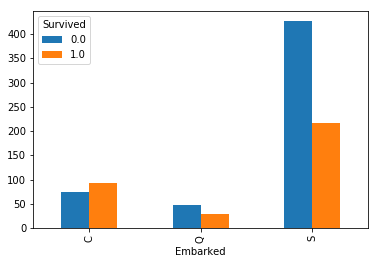

In [18]:
dataset.groupby(['Embarked','Survived'])['Embarked'].count().unstack().plot.bar()
plt.show()

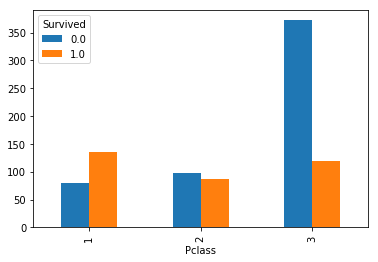

In [19]:
dataset.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot.bar()
plt.show()

In [20]:
dataset.groupby(['Pclass','Embarked'])['Pclass'].count().unstack().plot.bar()
plt.show()

In [11]:
dataset['title'] = dataset.Name.str.findall('([A-Z][a-z]+)\.')
dataset['title'] = [title[0] for title in dataset['title']]

In [21]:
dataset.groupby(['SibSp', 'Survived'])['Survived'].count().unstack().plot.bar(title='Number of sibligs and survived')
plt.show()

In [13]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

In [14]:
dataset.groupby('title')['title'].count()

title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
Name: title, dtype: int64

In [33]:
for title in set(dataset['title']):
    dataset.loc[(dataset['Age'].isna()) & (dataset.title==title), 'Age'] = int(dataset.loc[dataset.title==title,'Age'].mean())
       
# for title in set(dataset['title']):
#     mean = dataset.loc[(~dataset.Age.isna()) & (dataset.Sex == 'female') &(dataset.title==title), 'Age'].mean()
    
#     if not np.isnan(float(mean)):
#         dataset.loc[(dataset['Age'].isna()) & (dataset.Sex == 'female') & (dataset.title==title), 'Age'] = mean
#     else:
#         dataset.loc[(dataset['Age'].isna()) & (dataset.Sex == 'female') & (dataset.title==title), 'Age'] = dataset.loc[(~dataset.Age.isna()) & (dataset.Sex == 'female'), 'Age'].mean()
        
#     mean = dataset.loc[(~dataset.Age.isna()) & (dataset.title==title) & (dataset.Sex == 'male'), 'Age'].mean()
    
#     if not np.isnan(float(mean)):
#         dataset.loc[(dataset['Age'].isna()) & (dataset.Sex == 'male') & (dataset.title==title), 'Age'] = mean
#     else:
#         dataset.loc[(dataset['Age'].isna()) & (dataset.Sex == 'male') & (dataset.title==title), 'Age'] = dataset.loc[(~dataset.Age.isna()) & (dataset.Sex == 'male'), 'Age'].mean()

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [17]:
new_data = dataset.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
ids = test_dataset['PassengerId']

In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1308 non-null float64
Embarked    1307 non-null object
title       1309 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 92.1+ KB


In [19]:
new_data.loc[new_data.Embarked.isna(), 'Embarked'] = 'S'
new_data.loc[new_data.Fare.isna(), 'Fare'] = 0
new_data.loc[new_data.Survived.isna(), 'Survived'] = 0

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
new_data['Sex'] = labelencoder.fit_transform(new_data['Sex'])
new_data['Embarked'] = labelencoder.fit_transform(new_data['Embarked'])
new_data['title'] = labelencoder.fit_transform(new_data['title'])

In [21]:
new_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title
0       0.0       3    1  22.0      1      0   7.2500         2     13
1       1.0       1    0  38.0      1      0  71.2833         0     14
2       1.0       3    0  26.0      0      0   7.9250         2     10
3       1.0       1    0  35.0      1      0  53.1000         2     14
4       0.0       3    1  35.0      0      0   8.0500         2     13

In [22]:
"""xt_column = 0
for i in [1,2,7,8]:
    onehotencoder = OneHotEncoder(categorical_features=[1,2,7,8])
    new_data = onehotencoder.fit_transform(new_data).toarray()
    new_data = new_data[:,1:]
"""

'xt_column = 0\nfor i in [1,2,7,8]:\n    onehotencoder = OneHotEncoder(categorical_features=[1,2,7,8])\n    new_data = onehotencoder.fit_transform(new_data).toarray()\n    new_data = new_data[:,1:]\n'

In [23]:
import xgboost as xgb

In [24]:
x = new_data.iloc[:len(dataset)-len(test_dataset),1:]
y = new_data.iloc[:len(dataset)-len(test_dataset),0]

x_test_data = new_data.iloc[len(dataset)-len(test_dataset):,1:]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
xgb.DMatrix(data=x, label=y)

In [27]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5, n_estimators = 10, random_state=0)

In [28]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(x_test_data).astype(int)

/home/atilla/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
#confusion_matrix(y_test, preds)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, max_features=3,n_estimators=70,random_state=0)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test).astype(int)


/home/atilla/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
confusion_matrix(y_test, preds)

array([[103,   8],
       [ 17,  51]])

In [32]:
preds = pd.DataFrame({'PassengerId': ids, 'Survived': preds})

ValueError: array length 179 does not match index length 418

In [ ]:
preds.to_csv('output.csv', index=False)